[20220817]

# 2. Model 2

Basic arima

## Goal
Find patterns on the features for target

## Plan
Checklist what will be done on the notebook :

        [ ] Get Data
        [ ] Modelling
                [ ] Hyper Parameter Tuning
                [ ] Feature selection (could be done with different notebook)
        [ ] Evaluation
        
## source

* https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [1]:
import yaml
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import joblib
# from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima.model import ARIMA
sys.path.insert(1,'../../src/')

## import myfunc inside src folder
import myfunc 
from ramal import eval_model

In [2]:
with open("../../config.yaml", "r") as f:
    config = yaml.load(f, Loader=yaml.FullLoader)

PATH_RAW = config['path']['raw']
PATH_INTERIM = config['path']['interim']
PATH_PROCESSED = config['path']['processed']
# PATH_MODEL = config['path']['artifact']+os.getcwd().split('\\')[-1]+'/'
PATH_MODEL = config['path']['artifact']+'iteration_0'+'/'
PATH_UDF = config['path']['udf']

## Get Data

In [3]:
# df = pd.read_csv(PATH_INTERIM + 'daily-min-temp3_iter0.csv')
# df.set_index('Date',inplace=True)

In [4]:
ts2 = joblib.load(PATH_MODEL+'ramal_1.pkl')

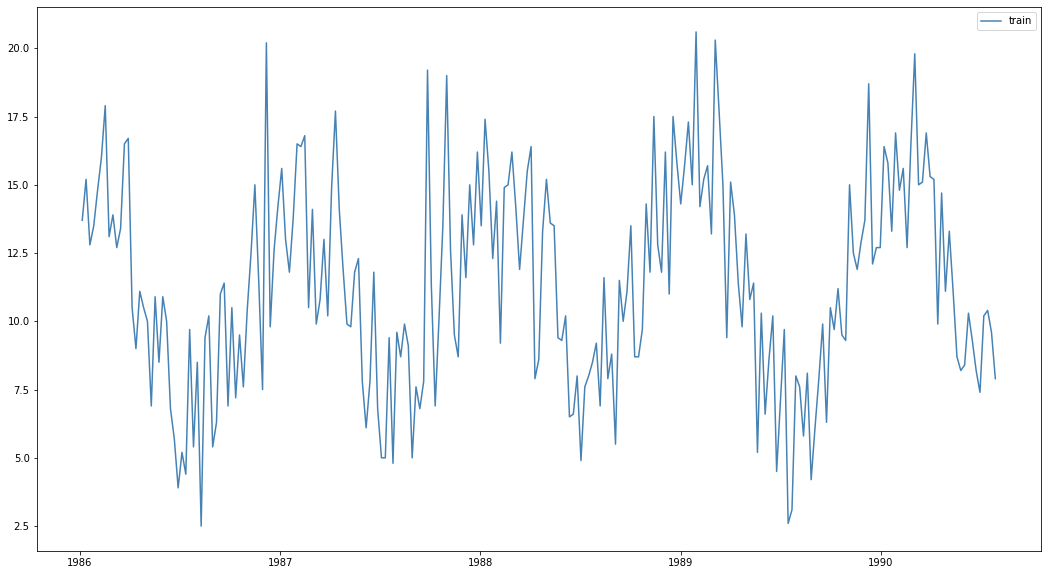

In [5]:
ts2.plot()

## Model

In [6]:
model1 = ARIMA(ts2.data, order=(4,0,1), seasonal_order=(1, 1, 1, 27))
# model1 = ARIMA(ts2.data, order=(3,1,2))
arima_model1 = model1.fit()
print(arima_model1.summary())

                                    SARIMAX Results                                     
Dep. Variable:                             Temp   No. Observations:                  239
Model:             ARIMA(4, 0, 1)x(1, 1, 1, 27)   Log Likelihood                -549.017
Date:                          Sat, 20 Aug 2022   AIC                           1114.034
Time:                                  01:58:51   BIC                           1140.886
Sample:                              01-05-1986   HQIC                          1124.887
                                   - 07-29-1990                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6892      0.187      3.688      0.000       0.323       1.055
ar.L2          0.0083      0.110      0.076      0.

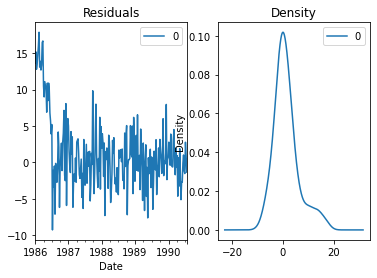

In [7]:
residuals = pd.DataFrame(arima_model1.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

## Eval

In [8]:
train_pred_wrap = arima_model1.get_prediction()

In [9]:
train_pred_wrap.summary_frame()

Temp,mean,mean_se,mean_ci_lower,mean_ci_upper
Date,,,,
1986-01-05,0.000000,1000.012922,-1959.989311,1959.989311
1986-01-12,0.000167,1000.012922,-1959.989144,1959.989478
1986-01-19,0.000323,1000.012922,-1959.988987,1959.989634
1986-01-26,0.000423,1000.012922,-1959.988888,1959.989734
1986-02-02,0.000573,1000.012922,-1959.988738,1959.989884
...,...,...,...,...
1990-07-01,8.946223,3.019648,3.027821,14.864625
1990-07-08,7.435999,3.019642,1.517609,13.354389
1990-07-15,9.465414,3.019639,3.547031,15.383797


In [10]:
# train_pred_wrap.conf_int()

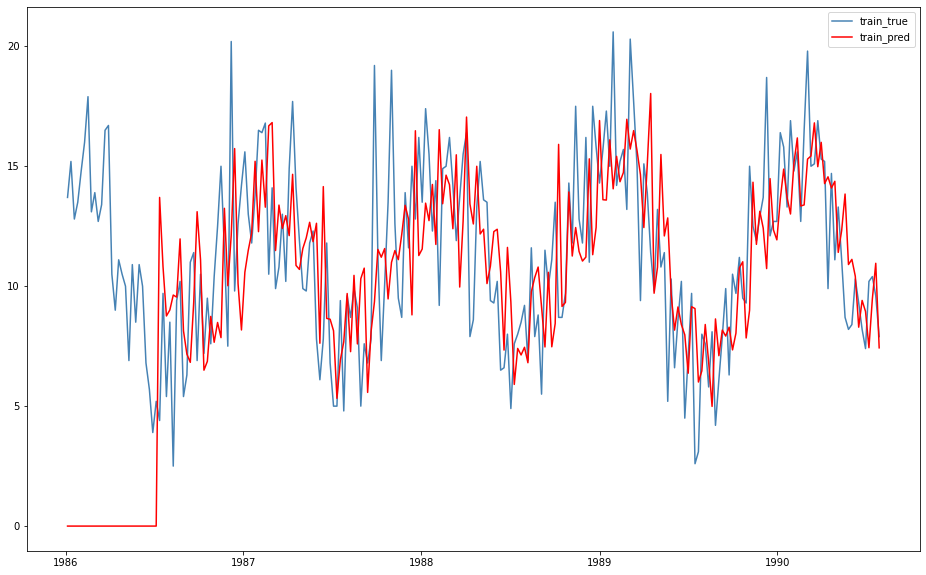

In [11]:
df_data_train = ts2.data
df_train_pred = train_pred_wrap.predicted_mean

## in sample
plt.figure(figsize=(16,10))
plt.plot(ts2.data, label='train_true', color='steelblue')

plt.plot(df_train_pred, label='train_pred', color='red')
plt.legend()

In [12]:
eval_model(ts2.data_1d(), df_train_pred)

{'MAE': 3.5685251216162865,
 'MAPE': 0.3571858018906254,
 'MSE': 25.893550324522288,
 'over_est_0': 0.45188284518828453,
 'under_est_0': 0.5481171548117155,
 'R2': -0.823642794016445}

In [13]:
# arima_model1.forecast(steps=10)

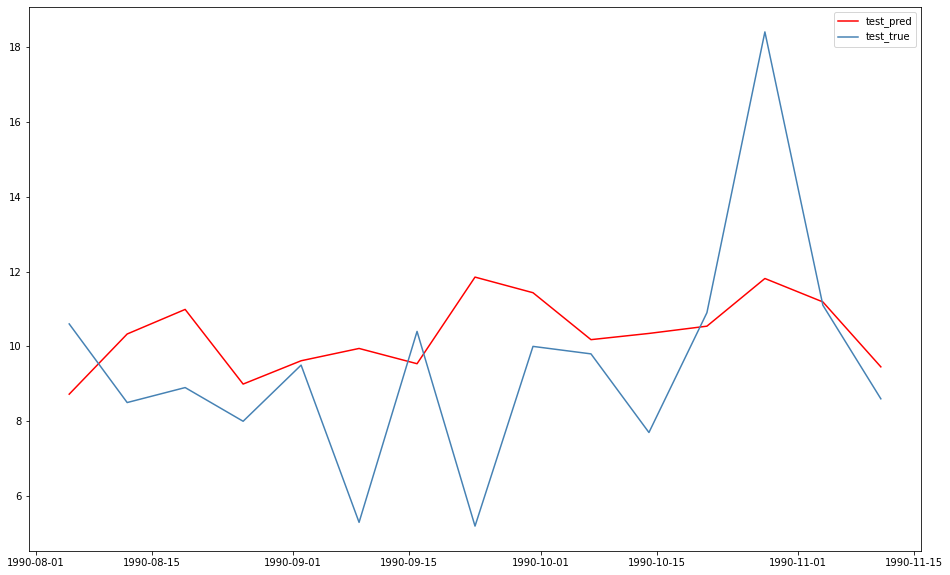

In [24]:
n_test = 15

df_data_test = ts2.data_test[:n_test]
df_test_pred = arima_model1.forecast(steps=n_test)

## in sample
plt.figure(figsize=(16,10))
plt.plot(df_test_pred, label='test_pred', color='red')
plt.plot(df_data_test,label='test_true', color='steelblue')
plt.legend()

In [25]:
eval_model(ts2.data_1d(test = 1)[:n_test], df_test_pred)

{'MAE': 2.094054537556615,
 'MAPE': 0.26838057396555826,
 'MSE': 8.815719007090324,
 'over_est_0': 0.7333333333333333,
 'under_est_0': 0.26666666666666666,
 'R2': -0.01822179041258032}